In [5]:
import numpy as np
import matplotlib.pyplot as plt
from src.network import Network
from src.data import Data

In [6]:
X = np.transpose(np.genfromtxt("xorig.csv", delimiter=","))
Y = np.transpose(np.genfromtxt("torig.csv", delimiter=","))
N = 13

In [7]:
K_range = [3, 5, 7]

errors = []

for K in K_range:
    network = Network(N, K=K, init_v=1/K, gradient_v=True)
    train, test = Data.sample(X, Y, P=200, Q=52)
    error = network.train(train, test, t_max=200)
    errors.append(error)

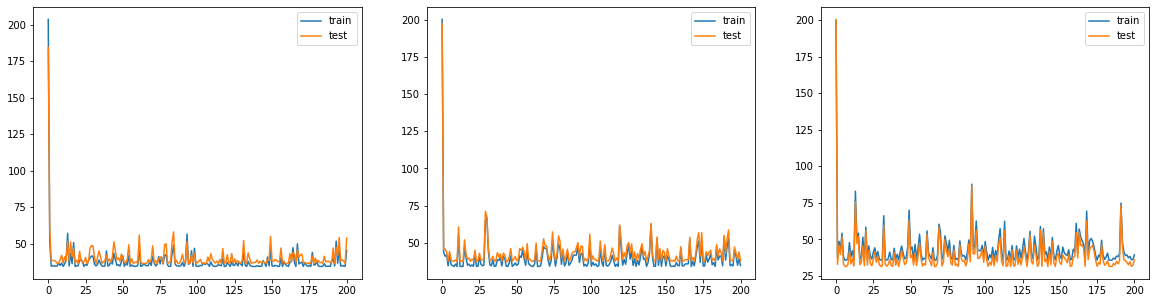

In [8]:
fig, plots = plt.subplots(1, len(K_range), figsize=(20, 5))

for plot, (train_error, test_error) in zip(plots, errors):
    plot.plot(train_error, label="train")
    plot.plot(test_error, label="test")
    plot.legend()

plt.tight_layout()